In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Fetching and cleaning data

In [41]:
df = pd.read_csv('delivery_time.csv')
df.shape

(21, 2)

In [2]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.isnull()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df = df.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st'})

In [6]:
#indicates a strong correlation
#But will do some transformation to get model accuracy 
df.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


# Visualize data

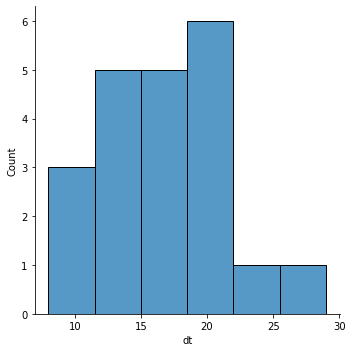

In [7]:
#There is less record after 21 interval of time 
import seaborn as sns
sns.displot(df['dt'])

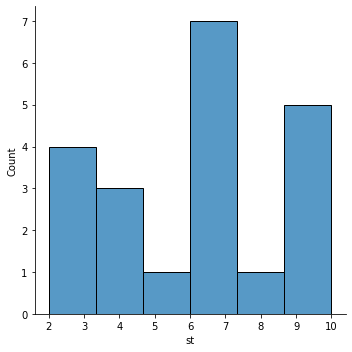

In [8]:
# there is less record of 5th and 8th
import seaborn as sns
sns.displot(df['st'])

In [9]:
#Drop the record which influenced the data
df1= df.drop(df.index[[10,20]],axis=0)

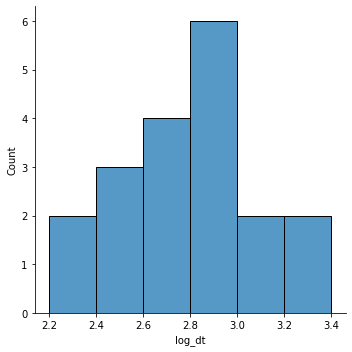

In [14]:
#Apply Log_transformation to get gaussian distribution
df1['log_dt']= np.log(df1['dt']+1)
#Using log_transformation we see the data is normally distributed
sns.displot(df1['log_dt'])

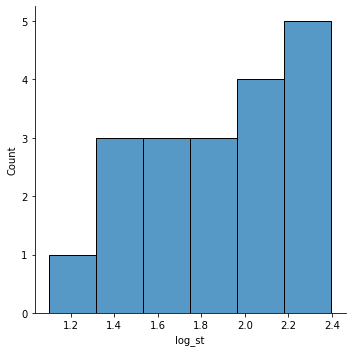

In [15]:
#Apply Log_transformation to get gaussian distribution
df1['log_st']= np.log(df1['st']+1)
#Using log_transformation we get left skewed data
sns.displot(df1['log_st'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqr_dt', ylabel='Density'>

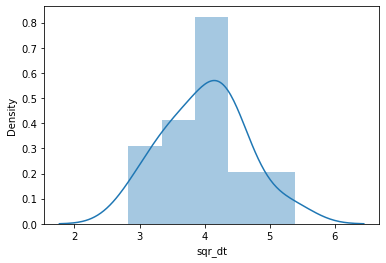

In [16]:
#We try some extra transformation to see weather the data get normally distributed or not
#Square_root Transformation
df1['sqr_dt'] = df1['dt']**(1/2)
#We get some what bell shaped here
sns.distplot(df1['sqr_dt'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqr_st', ylabel='Density'>

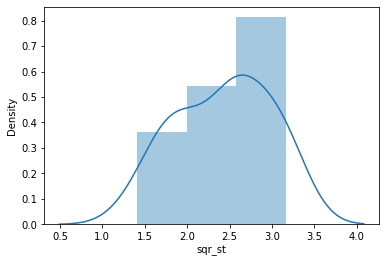

In [17]:
#We try some extra transformation to see weather the data get normally distributed or not
#Square_root Transformation
df1['sqr_st'] = df1['st']**(1/2)
#We get some what bell shaped here
sns.distplot(df1['sqr_st'])

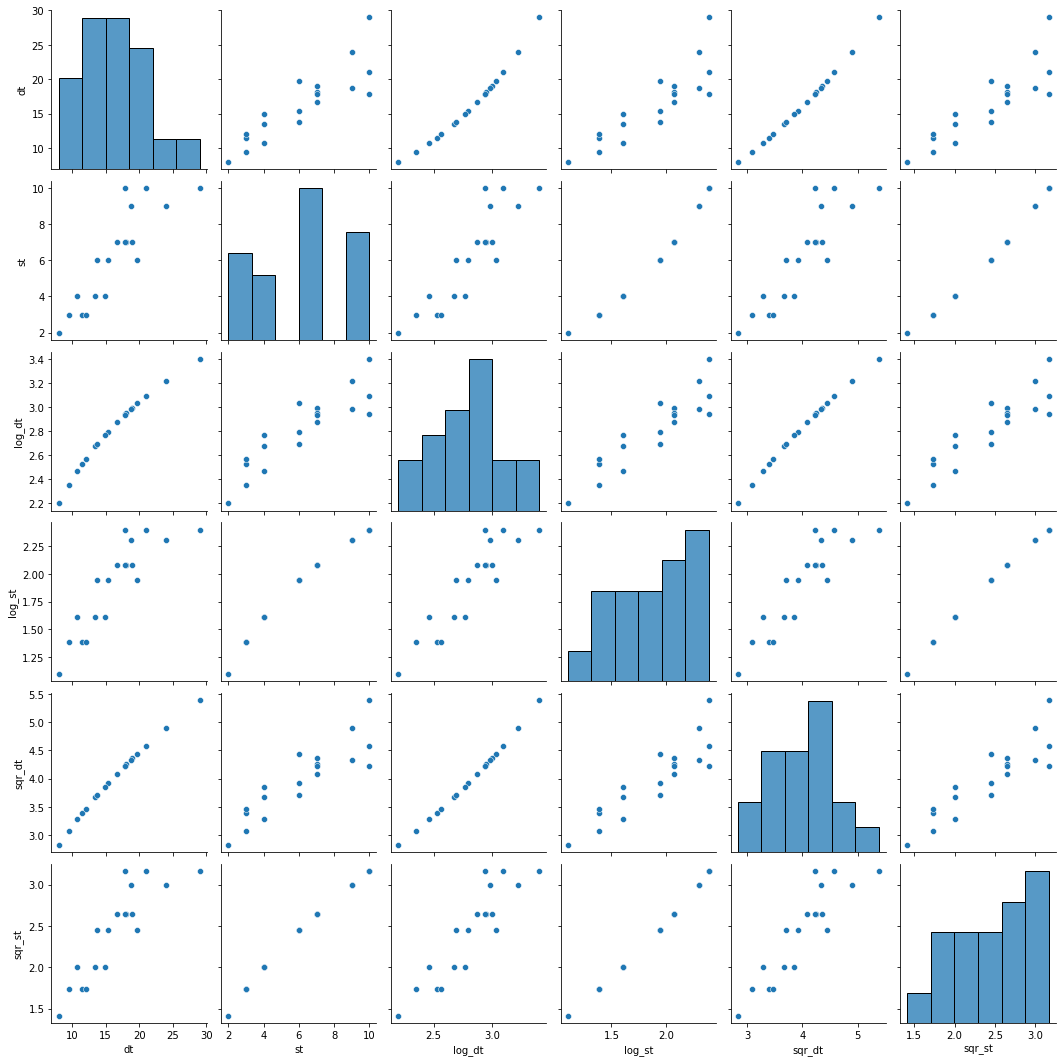

In [18]:
import seaborn as sns
sns.pairplot(df1)

In [ ]:
#Above pairplot wee see that there is positive relation between log_transformation and sqrt_transformation
#We confirm that using correlation matrix

<AxesSubplot:xlabel='log_st', ylabel='log_dt'>

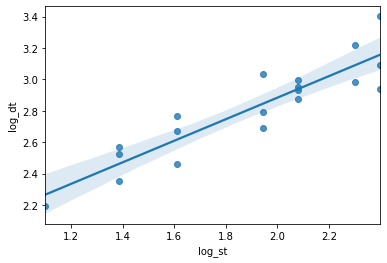

In [19]:
#data is good fit for linear regression model with less variance
import statsmodels.formula.api as smf
sns.regplot(x="log_st",y="log_dt",data=df1)

<AxesSubplot:xlabel='sqr_st', ylabel='sqr_dt'>

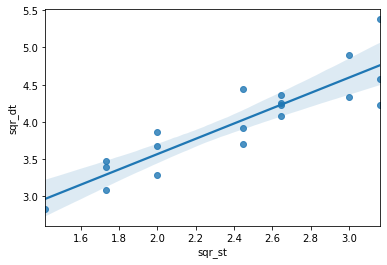

In [20]:
#data is good fit for linear regression model with less variance
import statsmodels.formula.api as smf
sns.regplot(x="sqr_st",y="sqr_dt",data=df1)

In [21]:
df1.corr()

,dt,st,log_dt,log_st,sqr_dt,sqr_st
dt,1.000000,0.870628,0.982574,0.867936,0.995007,0.872088
st,0.870628,1.000000,0.888411,0.985205,0.884683,0.994809
log_dt,0.982574,0.888411,1.000000,0.907848,0.996199,0.903047
log_st,0.867936,0.985205,0.907848,1.000000,0.893628,0.997526
sqr_dt,0.995007,0.884683,0.996199,0.893628,1.000000,0.893096
sqr_st,0.872088,0.994809,0.903047,0.997526,0.893096,1.000000


In [ ]:
#In above correlation we found that there is strong relation occur using log transformation 
#we use log transformation to build model

# Model prediction

In [22]:
#model train
import seaborn as sns
import statsmodels.formula.api as smf
model = smf.ols("log_dt~log_st",data =df1).fit()
model

In [23]:
model.params

Intercept    1.513663
log_st       0.685078
dtype: float64

In [24]:
#square of the correlation
(model.rsquared,model.rsquared_adj)

(0.8241873909061661, 0.8138454727241758)

In [25]:
newdata=pd.Series([10,4])
data_pred = pd.DataFrame(newdata,columns=['log_st'])
data_pred

,log_st
0,10
1,4


In [26]:
pred_=model.predict(data_pred)
pred_

0    8.364445
1    4.253976
dtype: float64

In [27]:
check_ = np.mean((pred_ - data_pred)**0.5)
check_

log_st   NaN
0        NaN
1        NaN
dtype: float64

In [28]:
newdata1=pd.Series([2.39,1.60])
data_pred1 = pd.DataFrame(newdata1,columns=['log_st'])
data_pred1

,log_st
0,2.39
1,1.60


In [29]:
#predict 
model.predict(data_pred1)

0    3.151000
1    2.609788
dtype: float64

In [40]:
df1

,dt,st,log_dt,log_st,sqr_dt,sqr_st
0,21.00,10,3.091042,2.397895,4.582576,3.162278
1,13.50,4,2.674149,1.609438,3.674235,2.000000
2,19.75,6,3.032546,1.945910,4.444097,2.449490
3,24.00,9,3.218876,2.302585,4.898979,3.000000
4,29.00,10,3.401197,2.397895,5.385165,3.162278
5,15.35,6,2.794228,1.945910,3.917908,2.449490
6,19.00,7,2.995732,2.079442,4.358899,2.645751
7,9.50,3,2.351375,1.386294,3.082207,1.732051
8,17.90,10,2.939162,2.397895,4.230839,3.162278
9,18.75,9,2.983153,2.302585,4.330127,3.000000
